<a href="https://colab.research.google.com/github/aesteki/Alcohol-Effects-on-Study/blob/main/main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We import the data

In [38]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# We upload teh dataset and store Maths and Portuguese in two variables "maths" and "port"
import pandas as pd
import numpy as np
import numpy
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from math import sqrt
url_maths = 'https://raw.githubusercontent.com/aesteki/Alcohol-Effects-on-Study/main/Maths.csv'
url_port = 'https://raw.githubusercontent.com/aesteki/Alcohol-Effects-on-Study/main/Portuguese.csv'
maths = pd.read_csv(url_maths)
port = pd.read_csv(url_port)

In [11]:
# replacing values

maths['school'].replace(['GP', 'MS'], [0, 1], inplace=True)
maths['sex'].replace(['M', 'F'], [0, 1], inplace=True)
maths['address'].replace(['U', 'R'], [0, 1], inplace=True)
maths['Pstatus'].replace(['A', 'T'], [0, 1], inplace=True)
maths['famsize'].replace(['GT3', 'LE3'], [0, 1], inplace=True)
maths['Mjob'].replace(['at_home', 'health', 'other', 'services', 'teacher'], [0, 1, 2, 3, 4], inplace=True)
maths['Fjob'].replace(['at_home', 'health', 'other', 'services', 'teacher'], [0, 1, 2, 3, 4], inplace=True)
maths['reason'].replace(['course', 'other', 'home', 'reputation'], [0, 1, 2, 3], inplace=True)
maths['guardian'].replace(['mother', 'father', 'other'], [0, 1, 2], inplace=True)
maths['schoolsup'].replace(['yes', 'no'], [0, 1], inplace=True)
maths['famsup'].replace(['yes', 'no'], [0, 1], inplace=True)
maths['paid'].replace(['yes', 'no'], [0, 1], inplace=True)
maths['activities'].replace(['yes', 'no'], [0, 1], inplace=True)
maths['nursery'].replace(['yes', 'no'], [0, 1], inplace=True)
maths['higher'].replace(['yes', 'no'], [0, 1], inplace=True)
maths['internet'].replace(['yes', 'no'], [0, 1], inplace=True)
maths['romantic'].replace(['yes', 'no'], [0, 1], inplace=True)

port['school'].replace(['GP', 'MS'], [0, 1], inplace=True)
port['sex'].replace(['M', 'F'], [0, 1], inplace=True)
port['address'].replace(['U', 'R'], [0, 1], inplace=True)
port['Pstatus'].replace(['A', 'T'], [0, 1], inplace=True)
port['famsize'].replace(['GT3', 'LE3'], [0, 1], inplace=True)
port['Mjob'].replace(['at_home', 'health', 'other', 'services', 'teacher'], [0, 1, 2, 3, 4], inplace=True)
port['Fjob'].replace(['at_home', 'health', 'other', 'services', 'teacher'], [0, 1, 2, 3, 4], inplace=True)
port['reason'].replace(['course', 'other', 'home', 'reputation'], [0, 1, 2, 3], inplace=True)
port['guardian'].replace(['mother', 'father', 'other'], [0, 1, 2], inplace=True)
port['schoolsup'].replace(['yes', 'no'], [0, 1], inplace=True)
port['famsup'].replace(['yes', 'no'], [0, 1], inplace=True)
port['paid'].replace(['yes', 'no'], [0, 1], inplace=True)
port['activities'].replace(['yes', 'no'], [0, 1], inplace=True)
port['nursery'].replace(['yes', 'no'], [0, 1], inplace=True)
port['higher'].replace(['yes', 'no'], [0, 1], inplace=True)
port['internet'].replace(['yes', 'no'], [0, 1], inplace=True)
port['romantic'].replace(['yes', 'no'], [0, 1], inplace=True)

In [40]:

#Decision Tree Model with 100 iterations to average the model training and test accuracy.

iterations = 100
trainAccuracy = 0
testAccuracy = 0
testRMSE = 0
for iter in range(iterations):
  maths = maths.sample(frac = 1)
  port = port.sample(frac = 1)

  data = maths
  featureColumns = data.columns.tolist()
  features = featureColumns[0:32]
  featureCount = len(features)
  target = featureColumns[-1]
  sampleCount = len(data["G3"])

  # Building the matrix for the training dataset

  X = [[0 for _ in range(featureCount)] for _ in range(sampleCount)]
  for j, feature in enumerate(features):
    for i, value in enumerate(data[feature]):
      X[i][j] = value
  
  # Specifying the target values
  
  y = [0 for _ in range(sampleCount)]
  for i, x in enumerate(data[target]):
    y[i] = x
  
  # Split dataset into training set and test set
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
  
  # Create Decision Tree classifer object
  
  clf = DecisionTreeClassifier(max_depth=5)
  
  # Train Decision Tree Classifer
  
  clf = clf.fit(X_train,y_train)
  
  #Predict the response for test dataset
  
  y_pred = clf.predict(X_train)
  trainAccuracy += metrics.accuracy_score(y_train, y_pred)
  
  # Model Accuracy, how often is the regressor correct?
  
  y_pred = clf.predict(X_test)
  testAccuracy += metrics.accuracy_score(y_test, y_pred)
  testRMSE += sqrt(mean_squared_error(y_test, y_pred))

trainAccuracy /= iterations
testAccuracy /= iterations
testRMSE /= iterations
print("Train Accuracy: %"+str(100*trainAccuracy))
print("Test Accuracy: %"+str(100*testAccuracy))
print("Test RMSE: "+str(testRMSE))

Train Accuracy: %64.9778481012658
Test Accuracy: %42.05063291139239
Test RMSE: 2.137781371925542


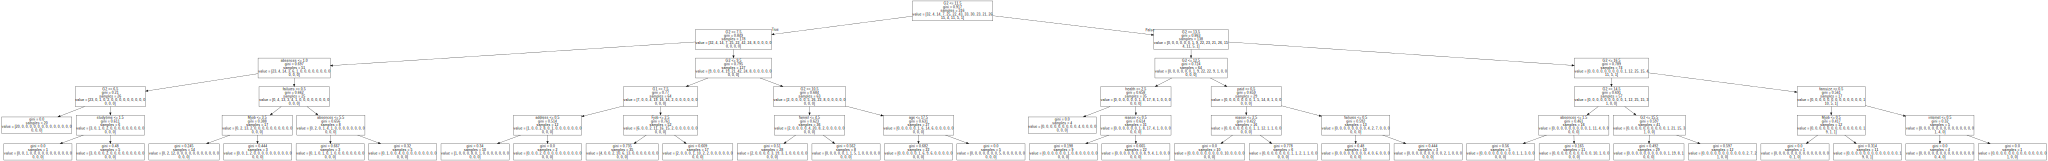

In [41]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(clf, out_file=None, feature_names=features))

In [43]:
from xgboost import XGBClassifier

#Gradient Boosted Decision Tree Model with 100 iterations to average the model training and test accuracy.

iterations = 100
trainAccuracy = 0
testAccuracy = 0
testRMSE = 0
for iter in range(iterations):
  data = maths.values

  # Split dataset into input and output columns

  X, y = data[:, :-1], data[:, -1]
  X, y = shuffle(X, y)

  # Split dataset into training set and test set

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
  model = XGBClassifier(max_depth=5, min_child_weight=2, gamma=2, tree_method='hist', subsample=0.7, colsample_bytree=0.8)
  model.fit(X_train, y_train)

  #Predict the response for test dataset

  y_pred = model.predict(X_train)
  trainAccuracy += metrics.accuracy_score(y_train, y_pred)

  # Model Accuracy, how often is the regressor correct?

  y_pred = model.predict(X_test)
  testAccuracy += metrics.accuracy_score(y_test, y_pred)
  testRMSE += sqrt(mean_squared_error(y_test, y_pred))
trainAccuracy /= iterations
testAccuracy /= iterations
testRMSE /= iterations
print("Train Accuracy: %"+str(100*trainAccuracy))
print("Test Accuracy: %"+str(100*testAccuracy))
print("Test RMSE: "+str(testRMSE))

Train Accuracy: %77.51265822784805
Test Accuracy: %46.683544303797476
Test RMSE: 2.1404362927683453
